In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


### Explicación del conjunto

El conjunto de datos **Pima Indians Diabetes Dataset** contiene datos de mujeres Pima de 21 años o más, de origen indígena en Arizona, y fue recopilado para estudiar la relación entre varios factores biométricos y la incidencia de la diabetes

#### Variables en el conjunto

- **Pregnancies (Embarazos)**: Número de veces que la paciente ha estado embarazada
- **Glucose (Glucosa)**: Concentración de glucosa plasmática a 2 horas en una prueba de tolerancia a la glucosa
- **Blood Presure (Presión Arterial)**: Presión arterial dastólica
- **Skin Thickness (Esperos de la piel)**: Espesor del pluegue cutáneo (mm)
- **Insulin (Insulina)**: Niveles de insulina en suero a 2 horas (mu U/ml)
- **BMI (índice de Masa Corporal)**: Índice de masa corporal
- **Diabetes Pedigree Function (Función de Herencia de Diabetes)**: Función que estima la posibilidad de tener diabetes asada en el historial familiar
- **Age (Edad)**: Edad de la paciente (en años)
- **Outcome (Resultado)**: Variable objetivo que indica si la paciente tiene diabetes o no

In [61]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [62]:
data.shape

(768, 9)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Podemos ver que tenemos en las columnas `Glucose, BloodPresure, SkinThickness, Insulin y BMI` tenemos valores mínimos de 0, lo que no es lógico, por lo que quiere decir que en verdad esas filas en donde hay ceros son datos `NaN` por lo que debemos de tratar esos datos para que no afecten el resultado que obtendríamos al crear nuestros modelos.

In [66]:
data_copy = data.copy()
data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [67]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Histograma

Un histograma es una representación gráfica de la distribución de un conjunto de datos numéricos. Se divide el rango de los datos en intervalos iguales y se cuenta cuántas observaciones caen en cada intervalo. La altura de cada barra representa la frecuencia de los datos en ese intervalo.

La forma de un histograma puede revelar mucho sobre la distribución de los datos. Una característica importante es la presencia de "colas", que son extensiones del histograma hacia uno u otro extremo.

#### Histogramas con cola a la derecha (Sesgo positivo)

- **Características**: La mayor parte de los datos se concentra en la parte izquierda del histograma, pero hay una 'cola' de valores más altos que se extiende hacia la derecha.
- **Interpretación**: Indica que la myoría de los valores son relativamente bajos, pero hay algunos valores extremadamente altos que 'jalan' la media hacia la derecha.

#### Histogramas con cola a la izquierda (Sesgo negativo)
- **Características**: La mayor parte de los datos se concentran en la parte derecha del histograma, pero hay una 'cola' de valores más bajos que se extienden hacia la izquierda.
- **Interpretación**: Indica que la mayorpia de los valores son relativamente altos, pero hay algunos valores extremadamente bajos que 'jalan' la media hacia la izquierda.

#### ¿Por qué es importante identificar las colas?

- **Elegir la prueba estadística adecuada**: Algunas pruebas estadísticas asumen que los datos tienen una distribución normal (en forma de campana). Si los datos están sesgados, estas pruebas pueden no ser apropiadas.
- **Identificar valores atípicos**: Las colas pueden indicar la presencia de valores atípicos (outliers), que son datos que se desvían significativamente del resto.
- **Comprender mejor los datos**: La forma del histograma puede proporcionar pistas sobre el proceso que generó los datos y ayudar a identificar patrones y tendencias.

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

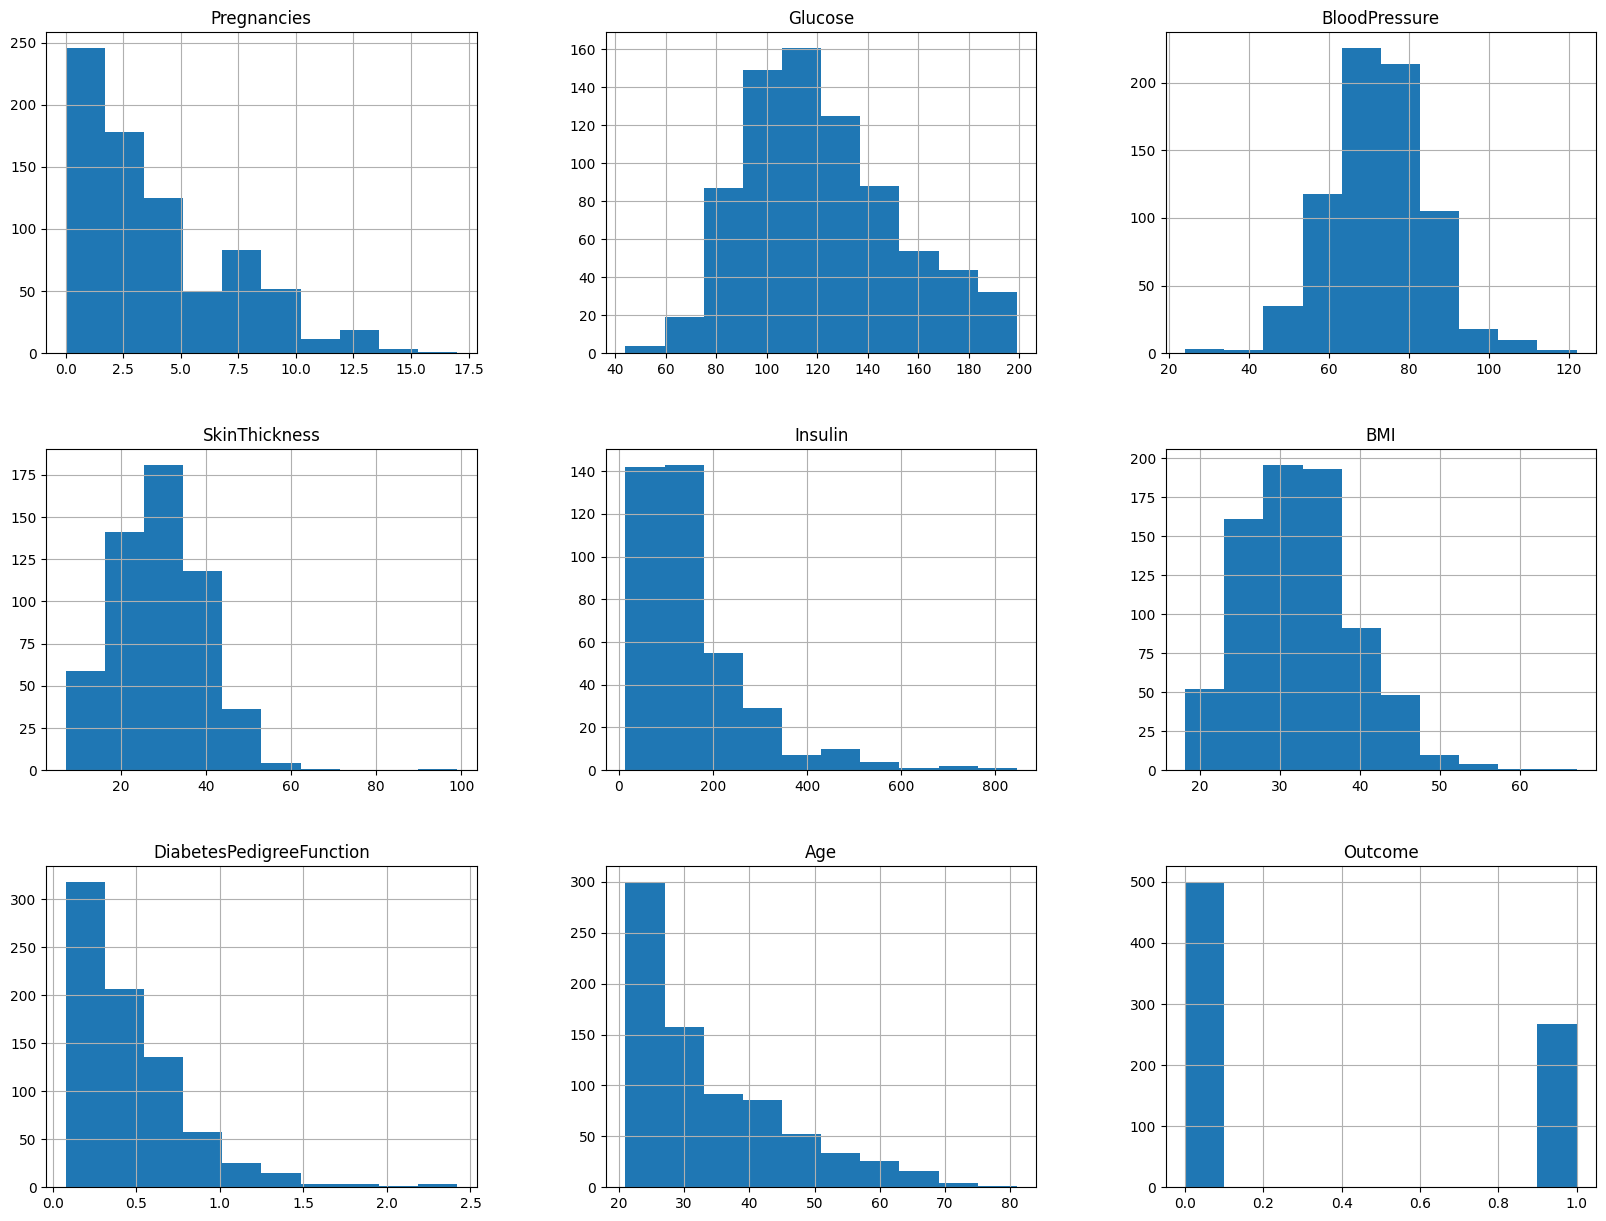

In [68]:
data_copy.hist(figsize=(20, 15))

<Axes: >

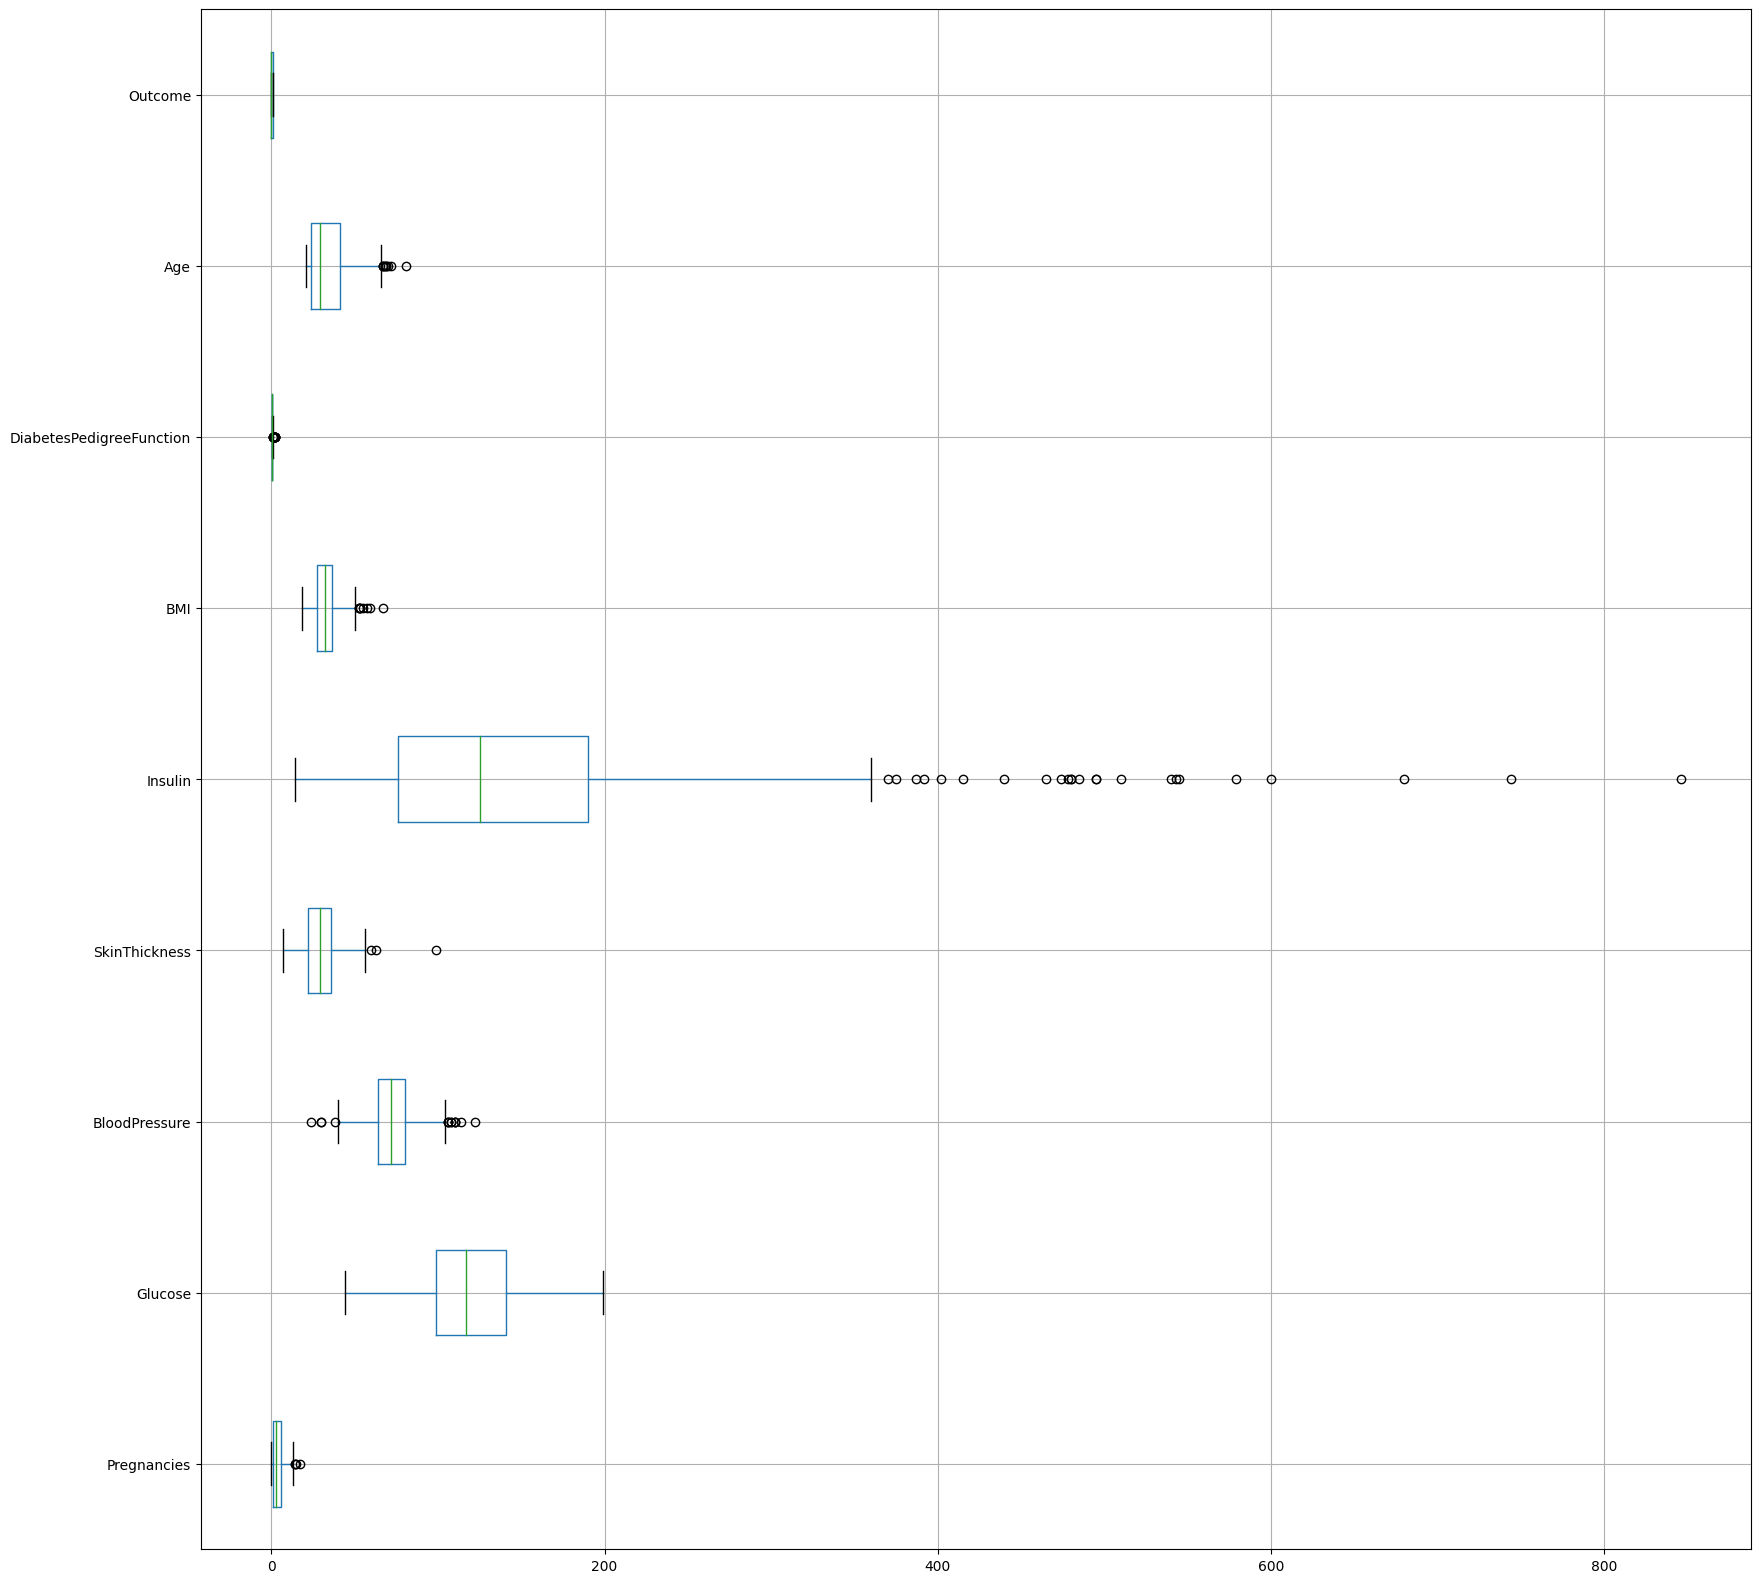

In [69]:
data_copy.boxplot(figsize=(20, 20), vert=False)

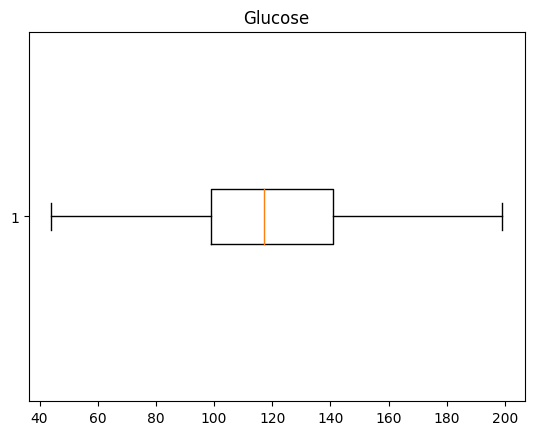

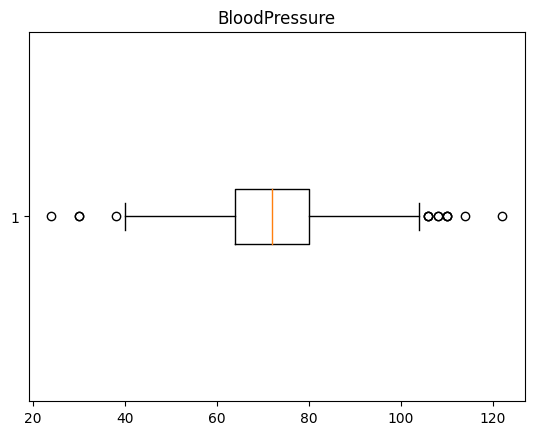

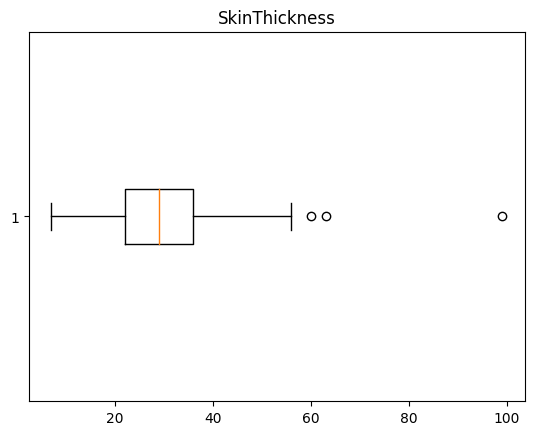

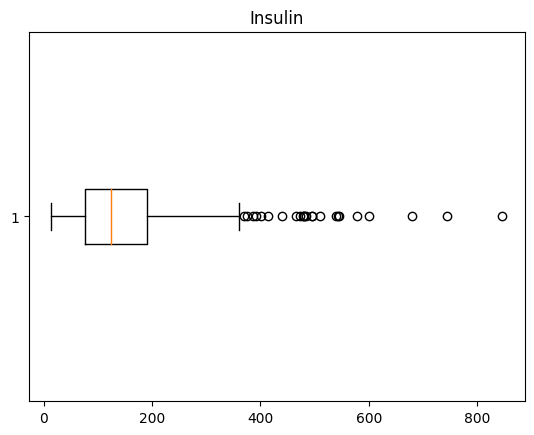

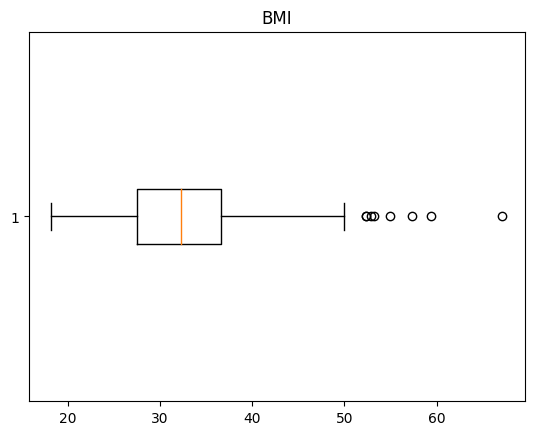

In [70]:
import matplotlib.pyplot as plt
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for col in cols:
    plt.boxplot(data_copy[col].dropna(), vert=False)
    plt.title(col)
    plt.show()

In [71]:
data_copy['Glucose'] = data_copy['Glucose'].fillna(data_copy['Glucose'].mean())
data_copy['BloodPressure'] = data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].median())
data_copy['SkinThickness'] = data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].median())
data_copy['Insulin'] = data_copy['Insulin'].fillna(data_copy['Insulin'].median())
data_copy['BMI'] = data_copy['BMI'].fillna(data_copy['BMI'].median())

In [72]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

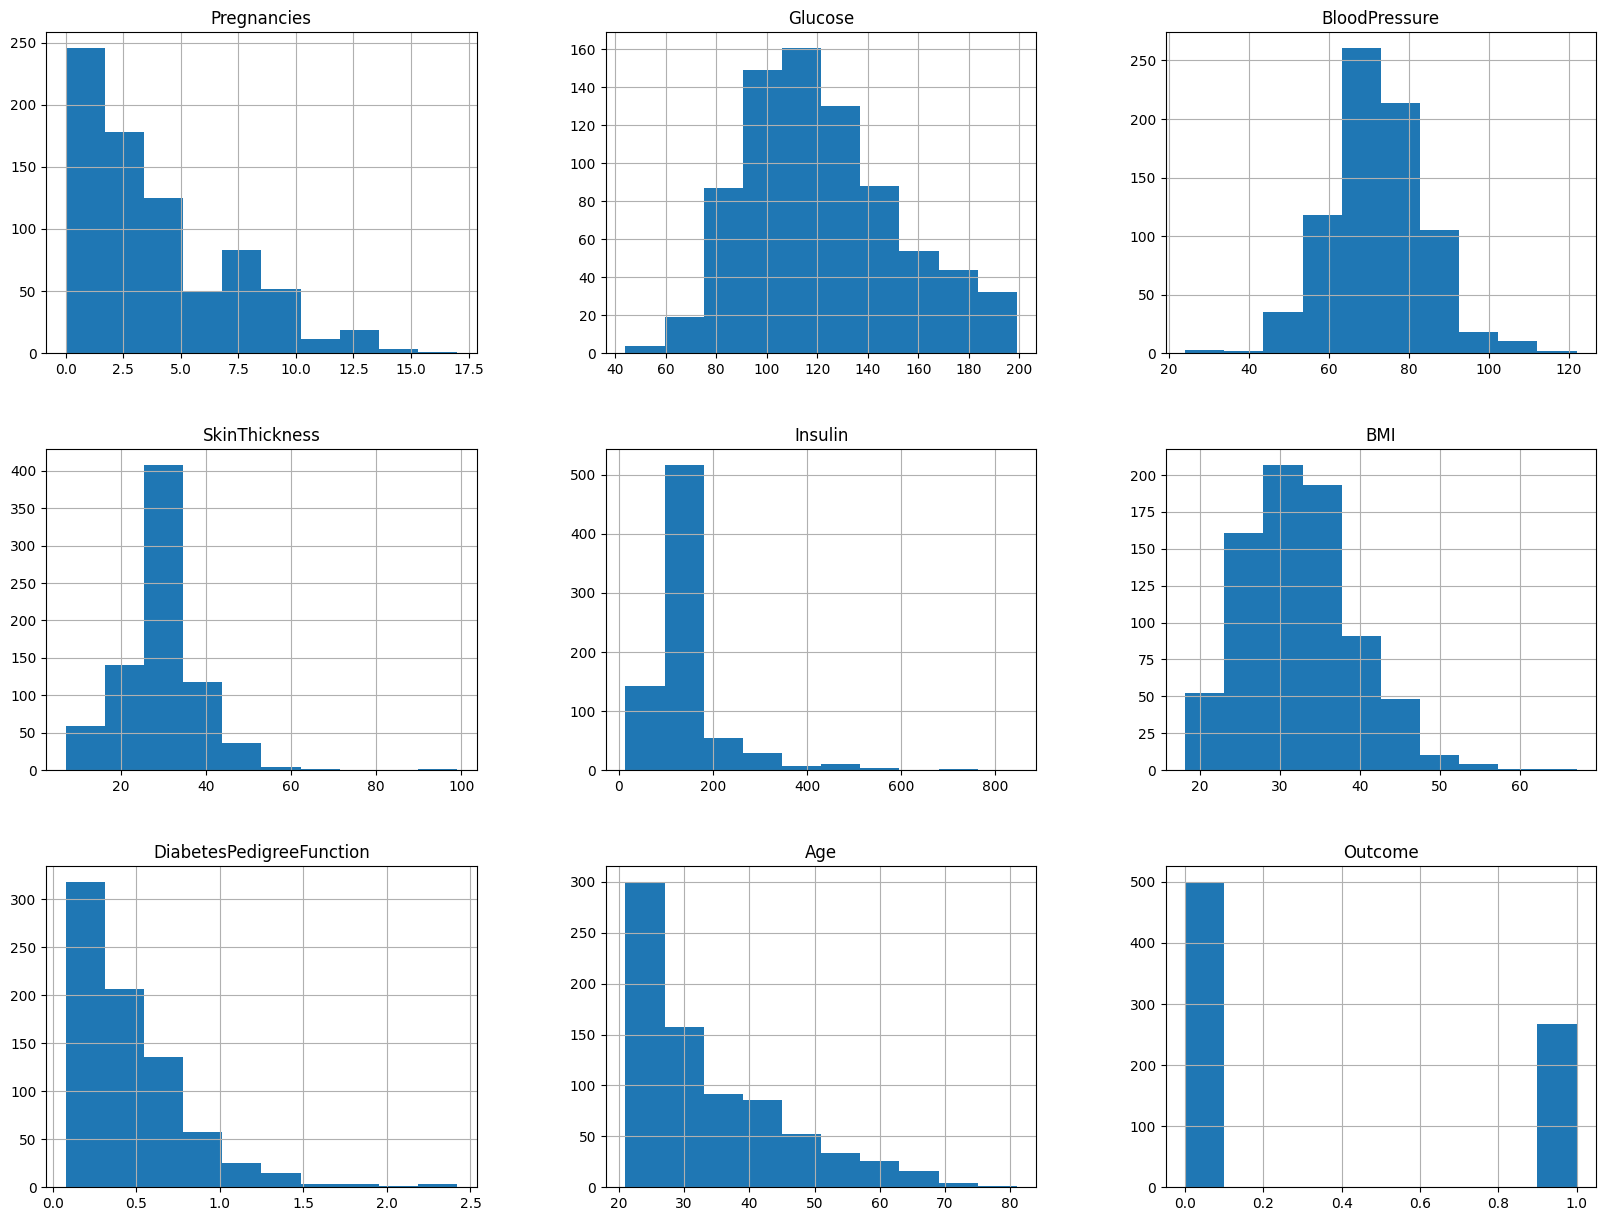

In [73]:
data_copy.hist(figsize=(20, 15))

In [74]:
import seaborn as sns

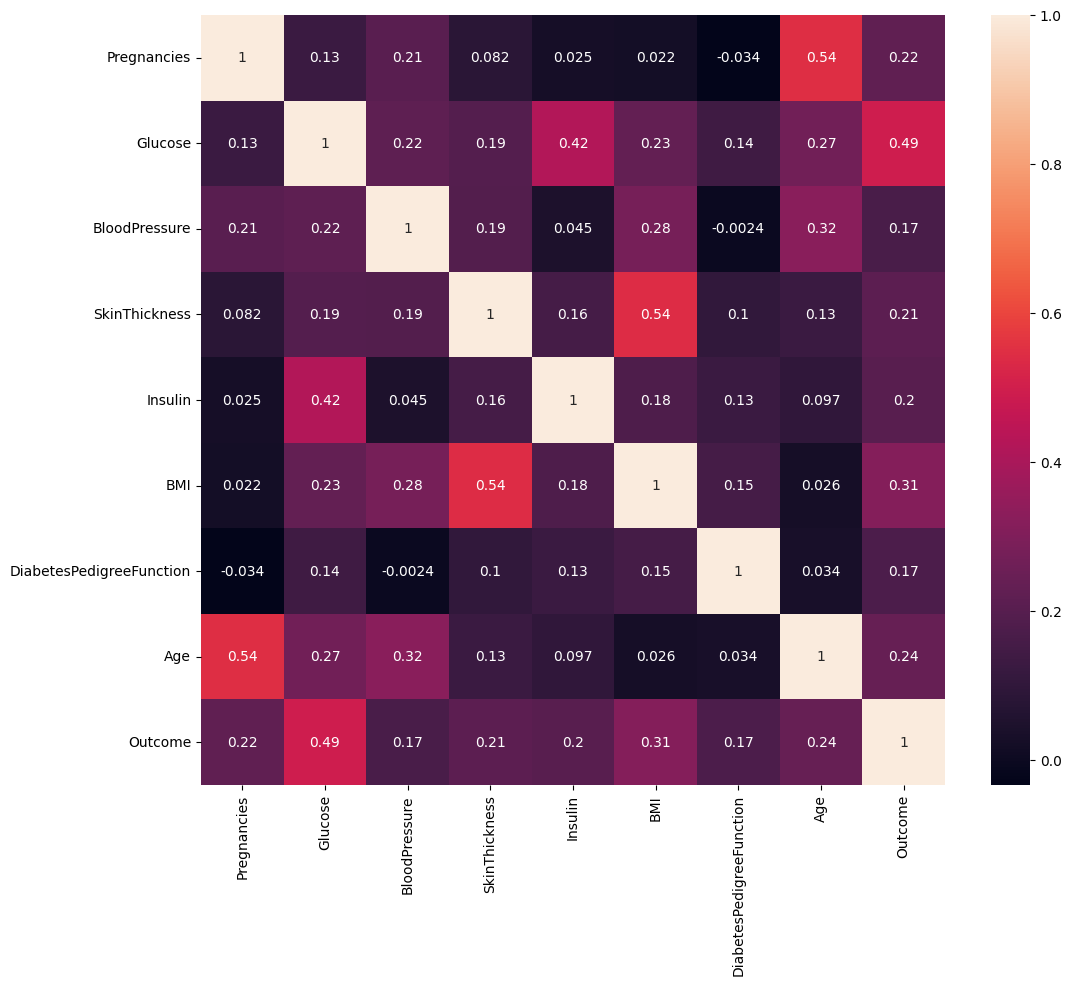

In [75]:
plt.figure(figsize=(12,10))
p=sns.heatmap(data_copy.corr(), annot=True)

### Escalado de variables

El escalado de variables es una técnica de preprocesamiento de datos que consiste en ajustar los valores de las variables de un conjunto de datos a una escala común. Esto se hace con el objetivo de que todas las variables tengan la misma influecnia en los modelos de machine learning, especialmente en aquellos que utilizan la distancia entre puntos como criterio, como los algoritmos de clustering o clasificación basado en vecinos cercanos.

#### ¿Por qué es importante escalar las variables?

- **Algoritmos sensibles a la escala**: Muchos algoritmos de machine learning, como la regresión logística, las máquinas de soporte vectorial (SVM) y los árboles de decisión, son sensibles a la escala de las variables. Si una variable tiene un rango de valores mucho mayor que otra, puede dominar el cálculo de la distancia y sesgar los resultados del modelo.
- **Convergencia más rápida**: En algoritmos de optimización basados en gradiente, como la regresión lineal, el escalado puede acelerar la convergencia al minimizar el condicionamiento de la matriz de características.
- **Interpretabilidad**: Al poner varias variables en una escala similar, facilita la comparación de sus coeficientes en los modelos de regresión.

#### Cuándo escalar las variables

- **Algoritmos basados en distancia**: Siempre que se utilice un algoritmo que calcule distancias entre puntos.
- **Algoritmos de gradiente descendiente**: Para acelerar la convergencia y mejorar la estabilidad.
- **Comparación de coeficientes**: Si se desea comparar la importancia relativa de diferentes variables en un modelo de regresión.

#### Cuando no escalar las variables

- **Árboles de decisión y sus variantes (Random Forest, Gradient Boosting)**: Estos algoritmos son invariantes a la escala, ya que se basan en umbrales.
- **Regresión logística con regularización L1 (Lasso)**: La regularización L1 tiende a seleccionar un subconjunto de características, y el escalado puede afectar la selección de características.

In [76]:
data_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [77]:
['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin', 'BloodPresure', 'DiabetesPedigreeFunction']
X = data_copy.drop('Outcome', axis=1).values
y = data_copy['Outcome'].values

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KN-N

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

test_f1 = []
test_pre = []
test_rec = []
test_score = []

for i in range(1, 16):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    print('KNN:', i)
    print(round(f1_score(y_test, y_pred)*100, 2))
    print(confusion_matrix(y_test, y_pred))
    print()
    
    test_f1.append(round(f1_score(y_test, y_pred)*100, 2))    
    test_pre.append(round(precision_score(y_test, y_pred)*100, 2))
    test_rec.append(round(recall_score(y_test, y_pred)*100, 2))
    test_score.append(round(knn.score(X_test, y_test) *100, 2))    

KNN: 1
57.39
[[72 27]
 [22 33]]

KNN: 2
46.67
[[85 14]
 [34 21]]

KNN: 3
56.67
[[68 31]
 [21 34]]

KNN: 4
55.77
[[79 20]
 [26 29]]

KNN: 5
57.63
[[70 29]
 [21 34]]

KNN: 6
56.36
[[75 24]
 [24 31]]

KNN: 7
57.85
[[68 31]
 [20 35]]

KNN: 8
54.72
[[77 22]
 [26 29]]

KNN: 9
59.83
[[72 27]
 [20 35]]

KNN: 10
62.26
[[81 18]
 [22 33]]

KNN: 11
62.07
[[74 25]
 [19 36]]

KNN: 12
60.95
[[81 18]
 [23 32]]

KNN: 13
59.46
[[76 23]
 [22 33]]

KNN: 14
60.95
[[81 18]
 [23 32]]

KNN: 15
60.18
[[75 24]
 [21 34]]



#### Factores para escoger el `n_neighbors`

La intuición detrás de esta pregunta es que, si `n_neighbors` es par y hay un empate en las clases de los vecinos más cercanos, el voto se podría dividir y afectar la precisión de la clasificación. Sin embargo, esto no es necesariamente una regla general.

##### Factores a considerar

1. **Naturaleza de los datos**:
    - **Datos balanceados**: Si los datos están bien balanceados, es menos probable que un empate en los votos cause problemas significativos.
    - **Datos desbalanceados**: Si hay un desequilibrio significativo entre las clases, un empate podría favorecer a la clase mayoritaría
    - **Decisiones de frontera**: Si hay muchos puntos de datos cerca de las fronteras de decisión, un empate puede ser más común y tener un mayor impacto
2. **Interpretabilidad**:
     - **Número impar de vecinos**: A menudo se prefiere un número impar de vecinos para evitar empates en la votación, especialmente cuando se utilizan algoritmos de votación mayoritaria
     - **Número par de vecinos**: En algunos casos, un número par puede llevar a resultados más robustos, especialmente cuando hay ruido en los datos

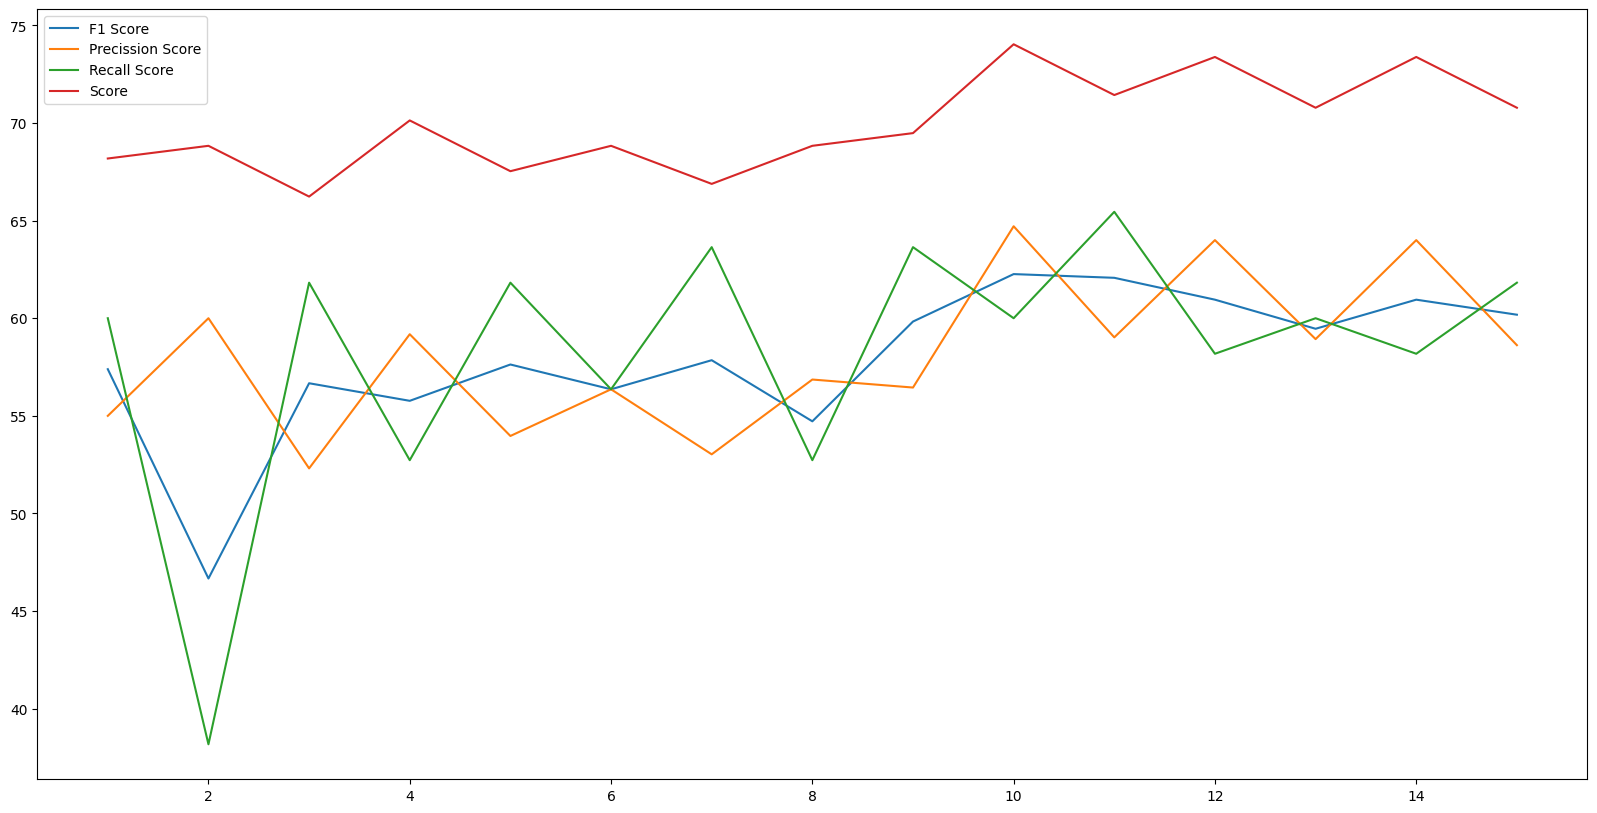

In [81]:
plt.figure(figsize=(20,10))
plt.plot(range(1 ,16), test_f1, label = 'F1 Score')
plt.plot(range(1 ,16), test_pre, label = 'Precission Score')
plt.plot(range(1 ,16), test_rec, label = 'Recall Score')
plt.plot(range(1 ,16), test_score, label = 'Score')
plt.legend()
plt.show()

### Experimentación Cruzada

La elección del valor óptimo de `n_neighbors` es un algoritmos KNN es crucial para su rendimiento. La experimentación cruzada es una técnica que permite evaluar de forma rigurosa diferentes valores de ese hiperparámetro.

#### ¿Por qué es importante la experimentación cruzada?
- **Evita el sobreajuste**: Al dividir los datos en múltiples conjuntos de entrenamiento y prueba, se obtiene una estimación más robusta del rendimiento del modelo
- **Permite comparar diferentes valores de hiperparámetros**: Se pueden evaluar diferentes valores de `n_neighbors` y seleccionar el que obtenga el mejor resultado promedio en los diferentes pliegues

### Técnicas de Experimentación Cruzada

1. **Validación Cruzada k-fold**:
    - **Funcionamiento**: Divide el conjunto de datos en *k* pliegues. En cada iteración, se utiliza un pliegue como conjunto de prueba y los restantes como conjunto de entrenamiento. Se calcula la métrica de evaluación (por ejemplo, precisión, F1-score) y se obtiene un promedio de las métricas de todos los pliegues.
    - **Ventajas**: Es una técnica sencilla y efectiva
    - **Desventajas**: El número de pliegues *k* debe de ser elegido  cuidadosamente. Valores comunes 5 o 10.
2. **Validación Cruzada Estratificada**:
    - **Funcionamiento**: similar a la validación cruzada k-fold, pero asegura que la proporción de clases en cada pliegue sea similar a la del conjunto de datos original. Esto es especialmente útil cuando se trabaja con conjuntos de datos desbalanceados.
3. **Validación Cruzada Leave-One-Out (LOO)**:
    - **Funcionamiento**: En cada iteración, se utiliza un solo dato como conjunto de prueba y el resto como conjunto de entrenamiento.
    - **Ventajas**: Proporciona una estimación muy precisa del error.
    - **Desventaja**: Puede ser computacionalmente costoso para grandes conjuntos de datos.
4. **Validación Cruzada Repetida**:
    - **Funcionamiento**: Se realiza la validación cruzada k-fold múltiples veces con diferentes particiones aleatorias de los datos.
    - **Ventajas**: Reduce la varianza de las estimaciones.
    
#### Herramientas en Python para la Experimentación Cruzada
- **scikit-learn**: Proporciona funciones como `cross_val_score`, `GridSearchCV` y `RandomizedSearchCV` para realizar diferentes tipos de validación cruzada.
- **Hyperopt**: Permite realizar optimización bayesiana de hiperparámetros, incluyendo `n_neighbors`.

In [82]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 16)}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='f1')
grid_search.fit(X_train, y_train)

print('Mejor valor de n_neighbors:', grid_search.best_params_)
best_knn = grid_search.best_estimator_

Mejor valor de n_neighbors: {'n_neighbors': 7}


#### Cross_val_score

Es una función en scikit-learn que te permite dividir tus datos en varios pliegues, entrenar tu modelo en algunos pliegues y evaluarlo en otros. De esta manera, se obtiene una estimación más robusta del rendimiento de tu modelo, ya que estás evaluándolo en diferentes subconjuntos de tus datos.

##### ¿Por qué es importante?
- **Evita el sobreajuste**: Al entrenar y evaluar tu modelo en diferentes partes de los datos, reduces el riesgo de que el modelo se ajuste demasiado a los datos de entrenamiento y no generalice bien a nuevos datos.
- **Proporciona una estimación más precisa del rendimiento**: En lugar de tener una única puntuación de avaluación, obtienes múltiples puntuaciones, lo que te da una idea más clara de cómo se comporta tu modelo en promedio.

In [83]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
for i in range(1, 16):
    knn = KNeighborsClassifier(i)
    scores = cross_val_score(knn, X_train, y_train, cv=5)    
    print('KNN:', i)
    print("Scores:", scores)
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print()

KNN: 1
Scores: [0.70731707 0.69918699 0.68292683 0.68292683 0.63114754]
Accuracy: 0.68 (+/- 0.05)

KNN: 2
Scores: [0.70731707 0.75609756 0.70731707 0.72357724 0.70491803]
Accuracy: 0.72 (+/- 0.04)

KNN: 3
Scores: [0.73170732 0.76422764 0.66666667 0.73170732 0.71311475]
Accuracy: 0.72 (+/- 0.06)

KNN: 4
Scores: [0.68292683 0.77235772 0.67479675 0.7398374  0.73770492]
Accuracy: 0.72 (+/- 0.07)

KNN: 5
Scores: [0.72357724 0.75609756 0.72357724 0.72357724 0.7295082 ]
Accuracy: 0.73 (+/- 0.03)

KNN: 6
Scores: [0.71544715 0.7804878  0.75609756 0.74796748 0.75409836]
Accuracy: 0.75 (+/- 0.04)

KNN: 7
Scores: [0.71544715 0.74796748 0.74796748 0.75609756 0.78688525]
Accuracy: 0.75 (+/- 0.05)

KNN: 8
Scores: [0.70731707 0.73170732 0.73170732 0.72357724 0.77868852]
Accuracy: 0.73 (+/- 0.05)

KNN: 9
Scores: [0.72357724 0.7398374  0.74796748 0.72357724 0.73770492]
Accuracy: 0.73 (+/- 0.02)

KNN: 10
Scores: [0.68292683 0.7398374  0.72357724 0.72357724 0.74590164]
Accuracy: 0.72 (+/- 0.04)

KNN: 11
S

#### RandomizedSearchCV

Si tienes un modelo de machine learning y quieres encontrar la mejor combinación de hiperparámetros para que funcione de manera óptima. En lugar de probar todas las posibles combinaciones, RamdomizerSearchCV toma un enfoque más aleatorio pero eficiente.

##### ¿Cómo funciona?

1. **Definifición del Espacio de Búsqueda**: Se define un diccionario que especifica los posibles valores o distribuciones para cada hiperparámetro que se quiere ajustar.
2. **Muestreo Aleatorio**: RandomizedSearchCV selecciona aleatoriamente un conjunto de combinaciones de hiperparámetros de este espacio de búsqueda.
3. **Evaluación**: Cada combinación de hiperperámetros se evalúa utilizando validación cruzada
4. **Selección de mejor modelo**: Se seleccionar el modelo que obtuvo la mejor puntuación en la validación cruzada

##### Ventajas de RandomizedSearchCV

- **Eficiencia**: Si es espacio de búsqueda es grande, RandomizedSeachCV puede encontrar buenas combinaciones de hiperparámetros en menos tiempo que GridSearchCV
- **Flexibilidad**: Permite especificar distribuciones para los hiperparámetros, lo que te da más control sobre la búsqueda
- **Eploración de un Espacio Amplio**: Al seleccionar combinaciones aleatorias, es más probable que se encuentren soluciones innovadoras y se evite quedar atrapado en óptimos locales

In [84]:
param_dist = {'n_neighbors': np.arange(1, 16),
              'weights': ['uniform', 'distance']}

knn = KNeighborsClassifier()
random_search = RandomizedSearchCV(knn, param_dist, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

print("Mejores parámetros:", random_search.best_params_)
print("Mejor score:", random_search.best_score_)

Mejores parámetros: {'weights': 'uniform', 'n_neighbors': 7}
Mejor score: 0.7508729841396775


In [89]:
cols = ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin', 'BloodPressure', 'DiabetesPedigreeFunction']
col_model = []

for col in cols:
    col_model.append(col)
    X = data_copy[col_model].values
    y = data_copy['Outcome'].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    knn = KNeighborsClassifier(7)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    print('Cols:', col_model)
    print(round(f1_score(y_test, y_pred)*100, 2))
    print(round(precision_score(y_test, y_pred)*100, 2))
    print(round(recall_score(y_test, y_pred)*100, 2))

    #print(confusion_matrix(y_test, y_pred))
    print()

Cols: ['Glucose']
52.34
53.85
50.91

Cols: ['Glucose', 'BMI']
64.71
70.21
60.0

Cols: ['Glucose', 'BMI', 'Age']
64.35
61.67
67.27

Cols: ['Glucose', 'BMI', 'Age', 'Pregnancies']
65.49
63.79
67.27

Cols: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness']
64.35
61.67
67.27

Cols: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin']
60.87
58.33
63.64

Cols: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin', 'BloodPressure']
57.85
53.03
63.64

Cols: ['Glucose', 'BMI', 'Age', 'Pregnancies', 'SkinThickness', 'Insulin', 'BloodPressure', 'DiabetesPedigreeFunction']
57.85
53.03
63.64

